<a href="https://colab.research.google.com/github/devjkcc/CoinGecko-Crypto-/blob/main/An%C3%A1lise_de_Criptomoeda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Nesse projeto escolhi usar os dados da API de criptomoeda, no qual irei realizar uma análise do preço de criptomoeda ao longo do tempo.
#Todos os insights e análises não serão redigidos aqui e sim na documentação que estarei também disponibilizando. Esse notebook terá apenas as explicações tecnicas.

In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
# Realizando a requisição com a api
import requests
from datetime import datetime

In [11]:
#Descobrindo o id do bitcoin

api_key = "CG-RujSxAev1K54o59GbWDAiPNj"

In [12]:
headers = {
    "Authorization": f'Bearer {api_key}',
    "Accept": "application/json"
}

In [25]:
# Passo 1: Realizar uma análise de preço dos útimos 30 dias do bitcoin
# Nessa cédula, construi uma função para fazer a requisição da api, utilizando a url disponibilizada e parametros
# Foi utilizado também tratamento de erros para facilitar o manuseio da aplicação
# Utilizou-se list compreension para obter os dados e direciona-los a uma lista
# O indice [0] é porque toda lista possui uma coluna com data e outra com os valores da lista
# O indice[1] significa que estará sendo incluido valores como preço na tabela prices
# Vale ressaltar que a formatação do timestamps é um formato padrão para transformar os dados da API no formato Y-M-D

def obter_dados(coin_id):
  url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
  params = {"vs_currency":"usd", "days": 90, "interval":"daily"}
  response = requests.get(url,params=params)

  if response.status_code == 200:
    data=response.json()

    timestamps = [datetime.fromtimestamp(day[0] / 1000).strftime('%Y-%m-%d') for day in data['prices']]
    prices = [day[1] for day in data['prices']]
    market_caps = [day[1] for day in data['market_caps']]
    total_volumes = [day[1] for day in data['total_volumes']]


    tabela = pd.DataFrame({'Data': timestamps, 'prices(USD)': prices, 'market_caps':market_caps, 'total_volumes': total_volumes
    })

    return tabela

# Caso a requisição não dê 200(Tudo certo) irá retornar o código de erro e o que significa
  else:
    return f'Erro:{response.status_code}, {response.txt}'

coin_id1 = 'bitcoin'
coin_id2 = 'ethereum'
df_bitcoin = obter_dados(coin_id1)
df_ethereum = obter_dados(coin_id2)

In [26]:
# Fazendo alterações necessária para concatenar as tabelas
# Os nomes foram alterados para não gerar problemas de concatenação

df_ethereum.columns = ['DataET', 'PrecoETH', 'Market_capsETH', 'total_volumesETH']
df_bitcoin.columns = ['Data', 'PrecoBT', 'Market_capsBT', 'total_volumesBT']


In [27]:
df_ethereum.head(10)

,DataET,PrecoETH,Market_capsETH,total_volumesETH
0,2024-07-28,3254.611673,3.914242e+11,1.449697e+10
1,2024-07-29,3272.850131,3.935790e+11,7.818234e+09
2,2024-07-30,3316.942189,3.992394e+11,1.845215e+10
3,2024-07-31,3276.981780,3.939430e+11,1.380587e+10
4,2024-08-01,3233.076805,3.886338e+11,1.614342e+10
5,2024-08-02,3204.246524,3.853402e+11,1.778641e+10
6,2024-08-03,2983.300977,3.585435e+11,1.878585e+10
7,2024-08-04,2906.715024,3.493954e+11,1.770196e+10
8,2024-08-05,2682.437393,3.234036e+11,2.217125e+10
9,2024-08-06,2415.631139,2.912451e+11,7.357103e+10


In [28]:
df_bitcoin.head(10)

,Data,PrecoBT,Market_capsBT,total_volumesBT
0,2024-07-28,68055.408390,1.342889e+12,3.097675e+10
1,2024-07-29,68242.247444,1.346263e+12,1.717524e+10
2,2024-07-30,66770.320918,1.317581e+12,4.252904e+10
3,2024-07-31,66219.051025,1.306758e+12,2.889238e+10
4,2024-08-01,64679.778647,1.275401e+12,3.140368e+10
5,2024-08-02,65357.529608,1.289157e+12,3.891130e+10
6,2024-08-03,61407.295474,1.211854e+12,3.900432e+10
7,2024-08-04,60738.744925,1.197962e+12,3.288555e+10
8,2024-08-05,58006.206587,1.147855e+12,3.366450e+10
9,2024-08-06,53956.261842,1.064889e+12,1.202460e+11


In [29]:
# Como foi comentado na documentação, o dataframe Ethereum estava tendo problemas para concatenação, representando todas as colunas com NaN
# Dessa forma foi utilizado o metodo reindex para que alinhamento com o df_bitcoin
df_ethereum=df_ethereum.reindex(df_bitcoin.index)

In [30]:
# A utilização do axis foi o ponto crucial para conseguir reverter o problema.
df_geral=pd.concat([df_bitcoin, df_ethereum],axis=1)

In [19]:
df_geral.head(10)

,Data,PrecoBT,Market_capsBT,total_volumesBT,DataET,PrecoETH,Market_capsETH,total_volumesETH
0,2024-10-11,60195.180738,1.189692e+12,2.948197e+10,2024-10-11,2381.781709,2.865526e+11,1.468678e+10
1,2024-10-12,62392.340483,1.233357e+12,3.200866e+10,2024-10-12,2435.713784,2.931627e+11,1.309724e+10
2,2024-10-13,63207.770621,1.249002e+12,1.766596e+10,2024-10-13,2477.613028,2.982825e+11,8.538997e+09
3,2024-10-14,62829.533686,1.241242e+12,1.678455e+10,2024-10-14,2466.860727,2.969776e+11,7.516544e+09
4,2024-10-15,66049.994927,1.306086e+12,4.655380e+10,2024-10-15,2628.504376,3.164515e+11,2.150294e+10
5,2024-10-16,66962.219945,1.323775e+12,5.179793e+10,2024-10-16,2602.076044,3.132161e+11,2.198643e+10
6,2024-10-17,67647.544148,1.337304e+12,4.064050e+10,2024-10-17,2611.700159,3.144351e+11,1.613569e+10
7,2024-10-18,67328.105270,1.330388e+12,3.451207e+10,2024-10-18,2603.120292,3.131946e+11,1.433039e+10
8,2024-10-19,68465.619207,1.353542e+12,3.998496e+10,2024-10-19,2643.156521,3.182457e+11,1.630189e+10
9,2024-10-20,68388.871290,1.351942e+12,1.411089e+10,2024-10-20,2649.979290,3.189754e+11,7.337170e+09


In [31]:
# A sequela do metodo utilizado era que a concatenação representava duas colunas Data, e como ambas possuiam os mesmos valores, a coluna DataET foi excluida.
df_geral = df_geral.drop(columns=['DataET'])

In [21]:
#Mostrar o dataset finalizado
df_bitcoin.head(15)

,Data,PrecoBT,Market_capsBT,total_volumesBT
0,2024-10-11,60195.180738,1.189692e+12,2.948197e+10
1,2024-10-12,62392.340483,1.233357e+12,3.200866e+10
2,2024-10-13,63207.770621,1.249002e+12,1.766596e+10
3,2024-10-14,62829.533686,1.241242e+12,1.678455e+10
4,2024-10-15,66049.994927,1.306086e+12,4.655380e+10
5,2024-10-16,66962.219945,1.323775e+12,5.179793e+10
6,2024-10-17,67647.544148,1.337304e+12,4.064050e+10
7,2024-10-18,67328.105270,1.330388e+12,3.451207e+10
8,2024-10-19,68465.619207,1.353542e+12,3.998496e+10
9,2024-10-20,68388.871290,1.351942e+12,1.411089e+10


In [17]:
# utilizei o metodo describe para gerar uma tabela com as principais métricas, para que fosse possível começar a análise.
df_geral.describe()

,PrecoBT,Market_capsBT,total_volumesBT,PrecoETH,Market_capsETH,total_volumesETH
count,16.000000,1.600000e+01,1.600000e+01,16.000000,1.600000e+01,1.600000e+01
mean,65791.067091,1.300478e+12,3.178569e+10,2559.838768,3.081423e+11,1.478444e+10
std,2922.348257,5.789264e+10,1.101700e+10,108.231648,1.302619e+10,4.343244e+09
min,60195.180738,1.189692e+12,1.411089e+10,2367.615097,2.850846e+11,7.337170e+09
25%,63113.211387,1.247062e+12,2.581455e+10,2474.924952,2.979563e+11,1.299740e+10
50%,67145.162607,1.327081e+12,3.234279e+10,2602.598168,3.132054e+11,1.505257e+10
75%,67785.668048,1.340267e+12,4.011009e+10,2632.167412,3.169000e+11,1.656163e+10
max,68962.829180,1.362382e+12,5.179793e+10,2742.959141,3.301276e+11,2.198643e+10


<Axes: title={'center': 'Box plot bitcoin'}, ylabel='PrecoBT'>

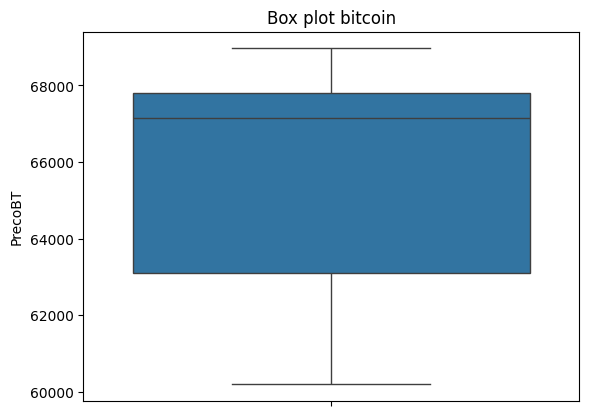

In [18]:
# A biblioteca seaborn foi utilizada por questões estéticas e desempenho
plt.title("Box plot bitcoin")
sns.boxplot(df_geral['PrecoBT'])

<Axes: title={'center': 'Box plot ETH'}, ylabel='PrecoETH'>

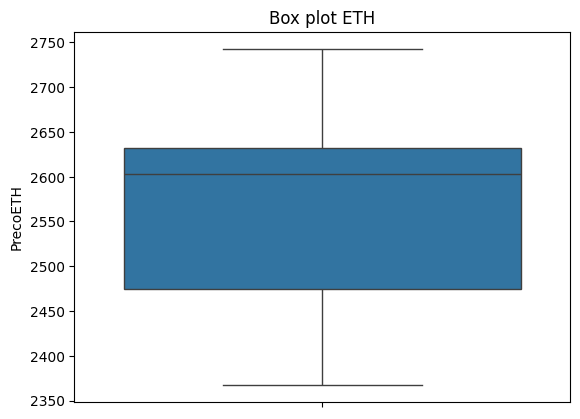

In [19]:
plt.title("Box plot ETH")
sns.boxplot(df_geral['PrecoETH'])


Text(0.5, 1.0, 'Volume de transações Ethereum')

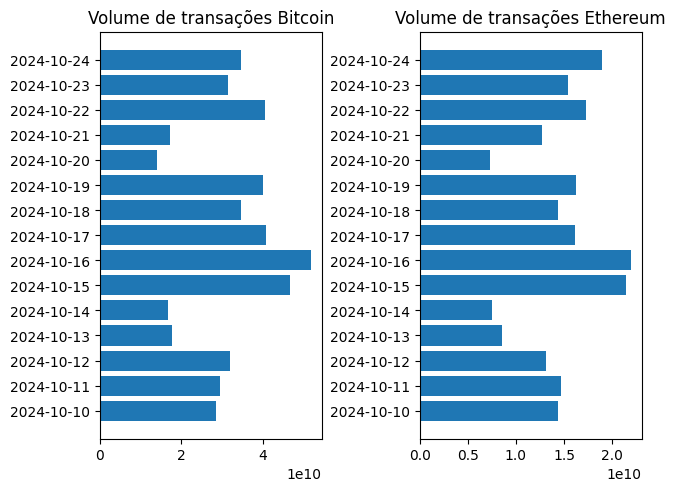

In [20]:
# Pessoalmente, aprendi outra forma de fazer subplots, porém, ao pesquisar, descobri esse metódo mais conciso e eficiente.
# Baseado em eixos
# A interpretação do gráfico foi colocada na documentação
fig, axes = plt.subplots(1,2, layout='constrained')

axes[0].barh(df_geral['Data'], df_geral['total_volumesBT'])
axes[0].set_title("Volume de transações Bitcoin")

axes[1].barh(df_geral['Data'], df_geral['total_volumesETH'])
axes[1].set_title("Volume de transações Ethereum")


Text(0.5, 1.0, 'Variação de Preço Ethereum')

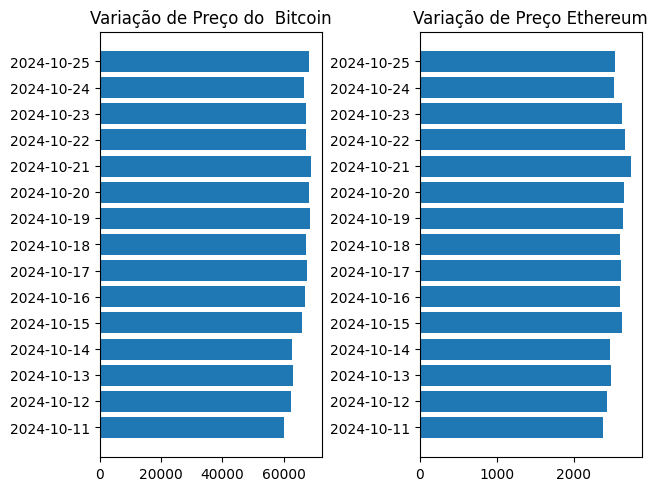

In [22]:
#O metodo segue o mesmo do anterior
# Esse gráfico não foi representado na documentação por não trazer grandes insights, porém deixo aqui como parte do desenvolvimento
fig, axes = plt.subplots(1,2, layout='constrained')

axes[0].barh(df_geral['Data'], df_geral['PrecoBT'])
axes[0].set_title("Variação de Preço do  Bitcoin")

axes[1].barh(df_geral['Data'], df_geral['PrecoETH'])
axes[1].set_title("Variação de Preço Ethereum")

Text(0.5, 1.0, 'Variação capital de mercado do ethereum')

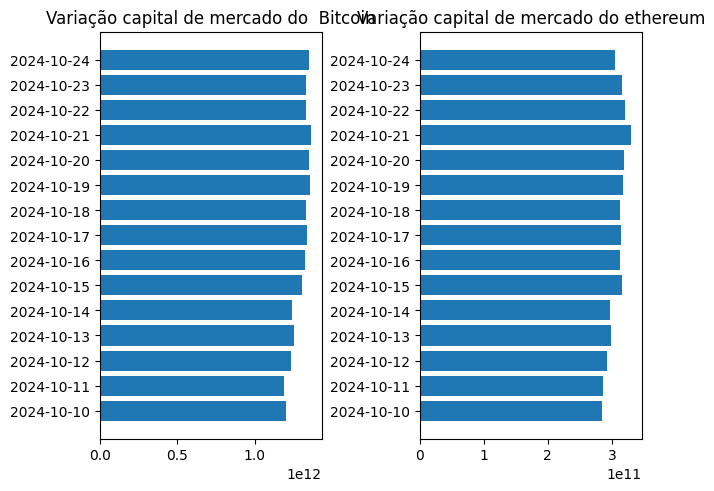

In [22]:
fig, axes = plt.subplots(1,2, layout='constrained')
axes[0].barh(df_geral['Data'], df_geral['Market_capsBT'])
axes[0].set_title("Variação capital de mercado do  Bitcoin")

axes[1].barh(df_geral['Data'], df_geral['Market_capsETH'])
axes[1].set_title("Variação capital de mercado do ethereum")

<ipython-input-23-9bc765d0cc2f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_geral['PrecoBT'])


<Axes: title={'center': 'Variação de preço Bitcoin'}, xlabel='PrecoBT', ylabel='Density'>

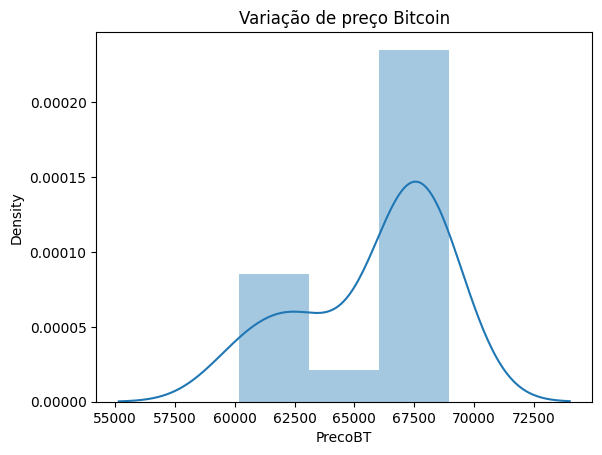

In [23]:
# o seaborn nos traz esse gráfico que possui uma interpretação interessante que foi desenvolvida na documentação.
plt.title('Variação de preço Bitcoin')
sns.distplot(df_geral['PrecoBT'])

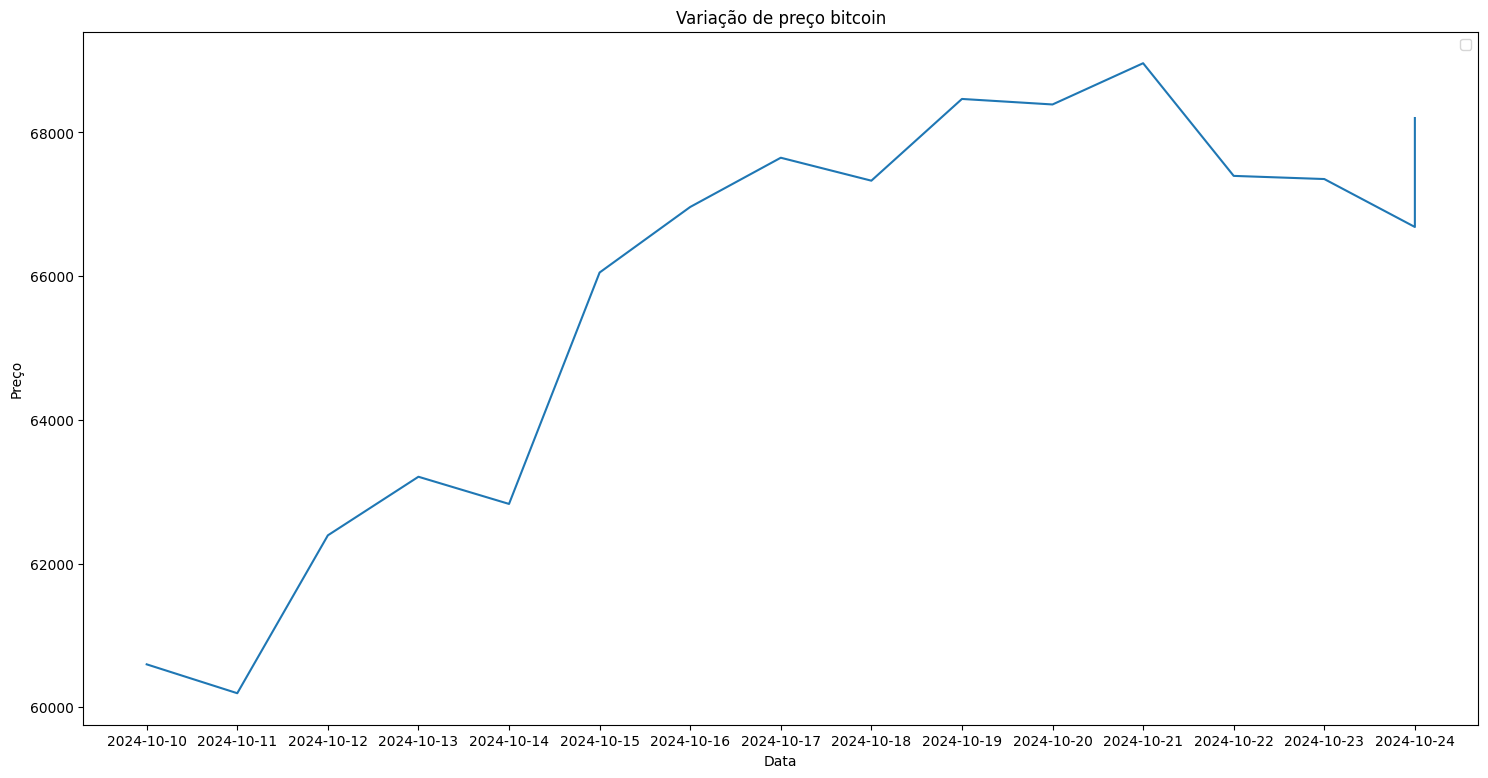

In [24]:
# Nesse gráfico, observamos a variação de preço nos últimos 15 dias do bitcoin
# Insights dos gráficos serão disponibilizadas na documentação
plt.figure(figsize=(18,9))
plt.plot(df_geral['Data'], df_geral['PrecoBT'])
plt.title("Variação de preço bitcoin")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.legend()

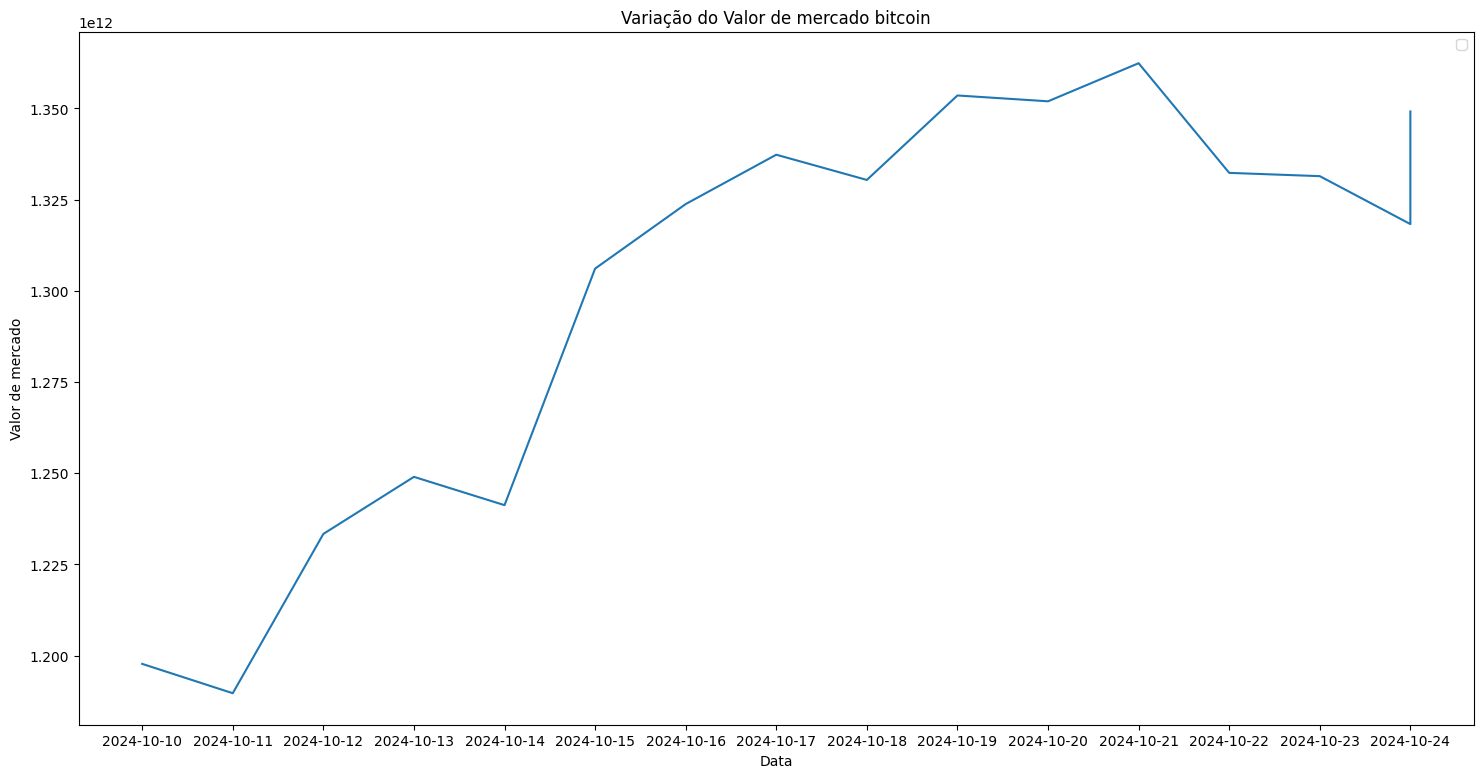

In [25]:
plt.figure(figsize=(18,9))
plt.plot(df_geral['Data'], df_geral['Market_capsBT'])
plt.title("Variação do Valor de mercado bitcoin")
plt.xlabel("Data")
plt.ylabel("Valor de mercado")
plt.legend()

<ipython-input-26-3bac8ee15e41>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_geral['PrecoETH'])


<Axes: title={'center': 'Variação de preço Ethereum'}, xlabel='PrecoETH', ylabel='Density'>

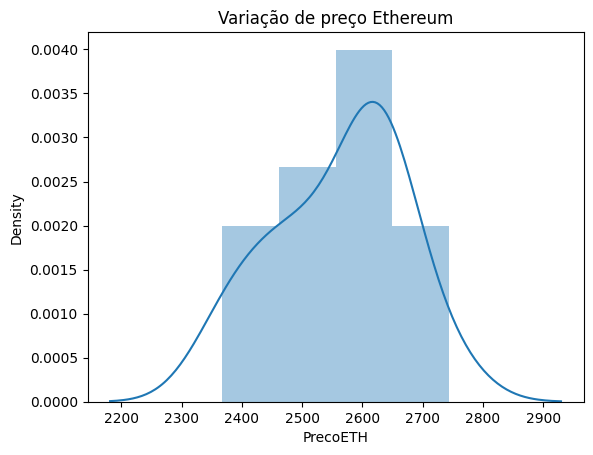

In [26]:
plt.title("Variação de preço Ethereum")
sns.distplot(df_geral['PrecoETH'])

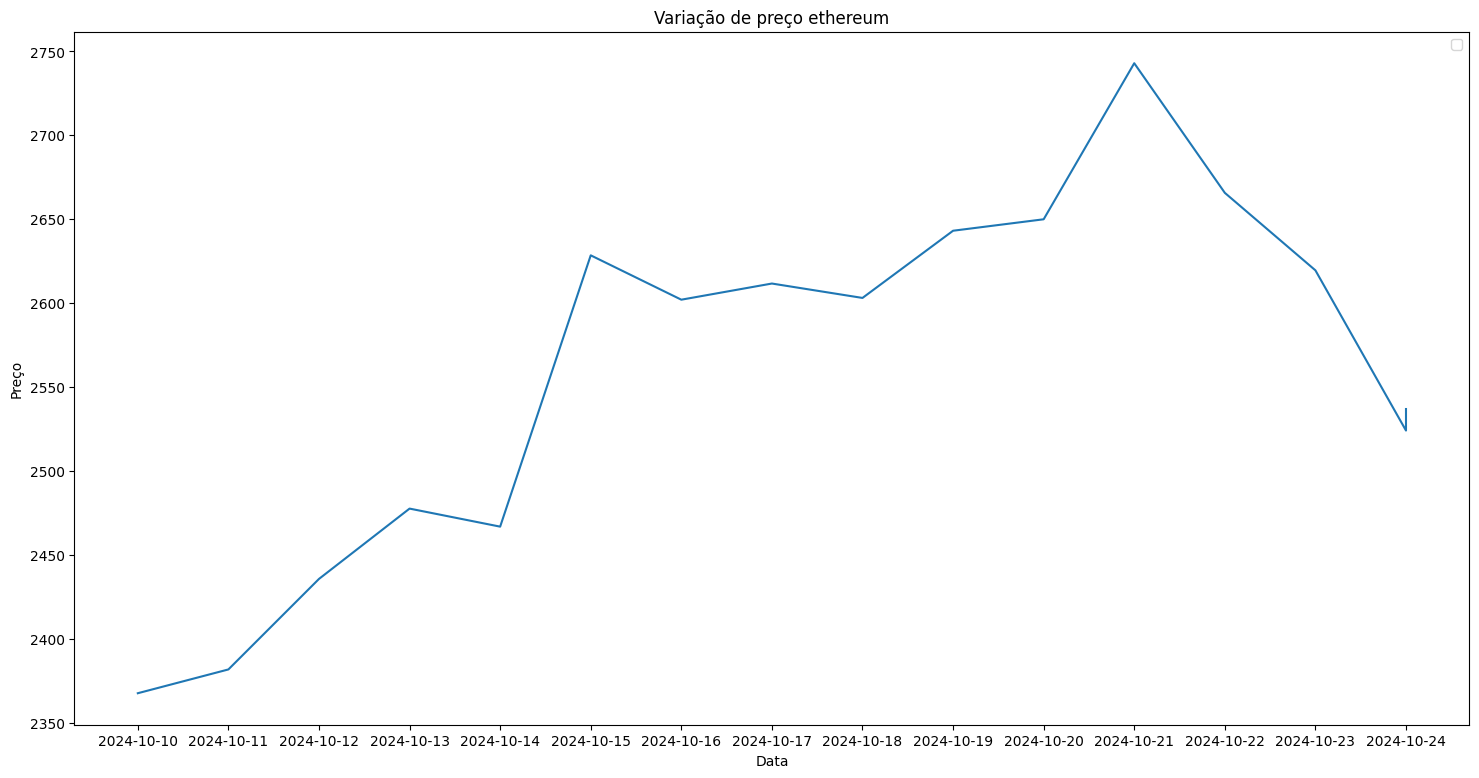

In [27]:

plt.figure(figsize=(18,9))
plt.plot(df_geral['Data'], df_geral['PrecoETH'])
plt.title("Variação de preço ethereum")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.legend()

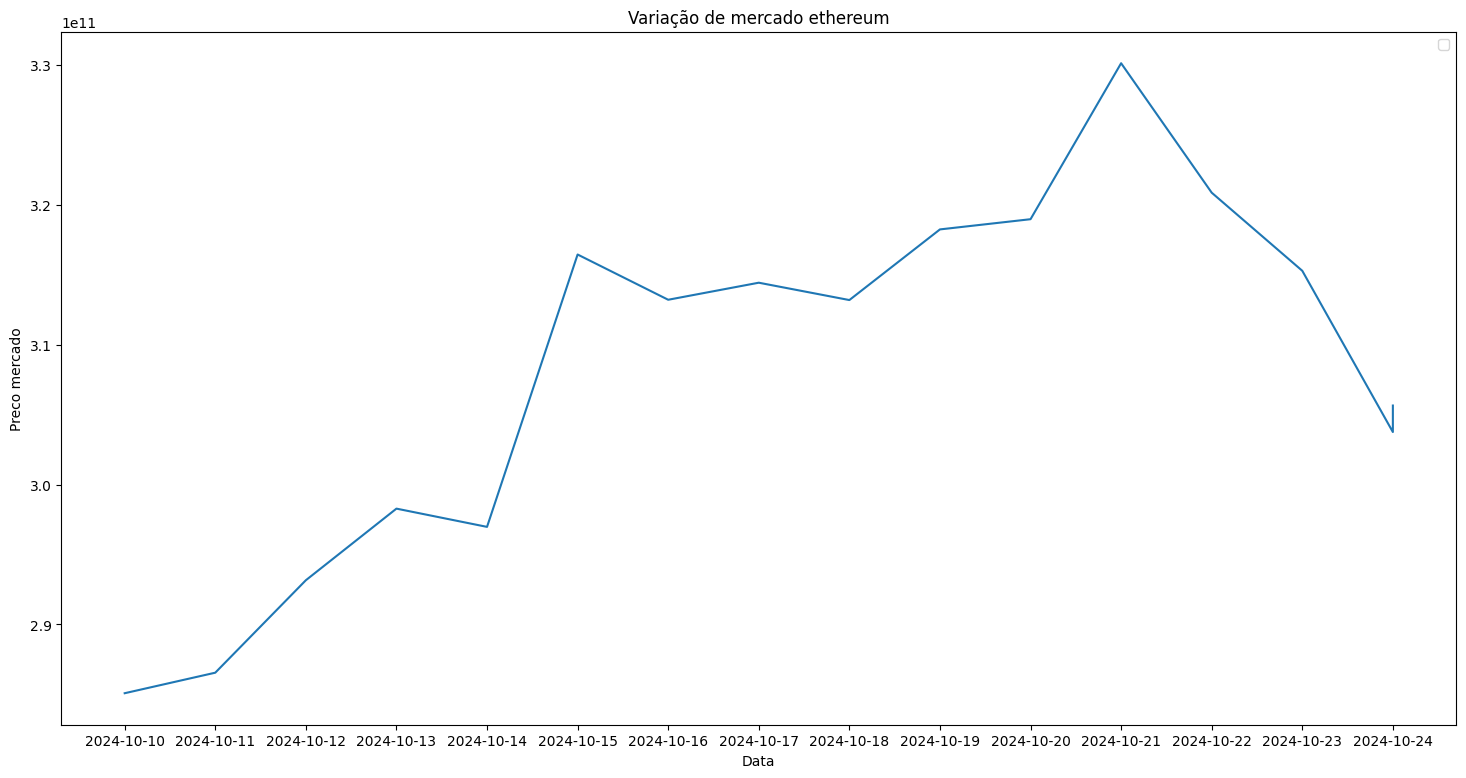

In [28]:
plt.figure(figsize=(18,9))
plt.plot(df_geral['Data'], df_geral['Market_capsETH'])
plt.title("Variação de mercado ethereum")
plt.xlabel("Data")
plt.ylabel("Preco mercado")
plt.legend()

In [80]:
# Essa tabela foi criada para que fosse possível analisar a correlação das variáveis.
tabela2= df_geral.drop(columns = ['Data'])

In [81]:
#Cálculo da correlação através do metodo corr()
correl = tabela2.corr()

<Axes: >

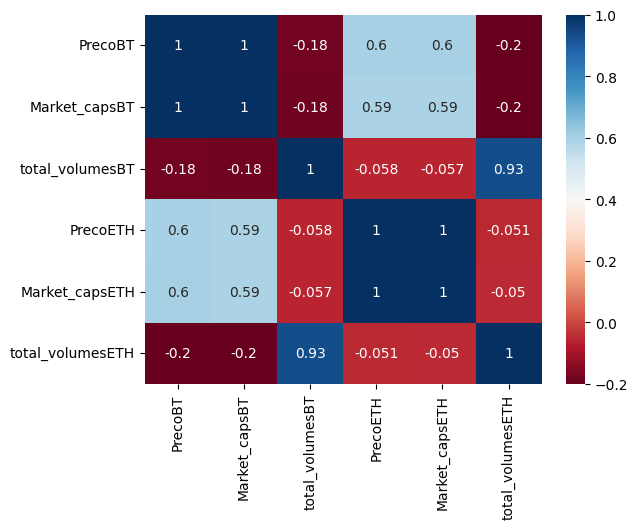

In [82]:
# Criação do mapa
#CMAP é uma métrica de estilo de cores
#O annot = TRUE é uma métrica para representar os resultados das correlações por cédula.

sns.heatmap(correl, cmap = 'RdBu', annot=True)

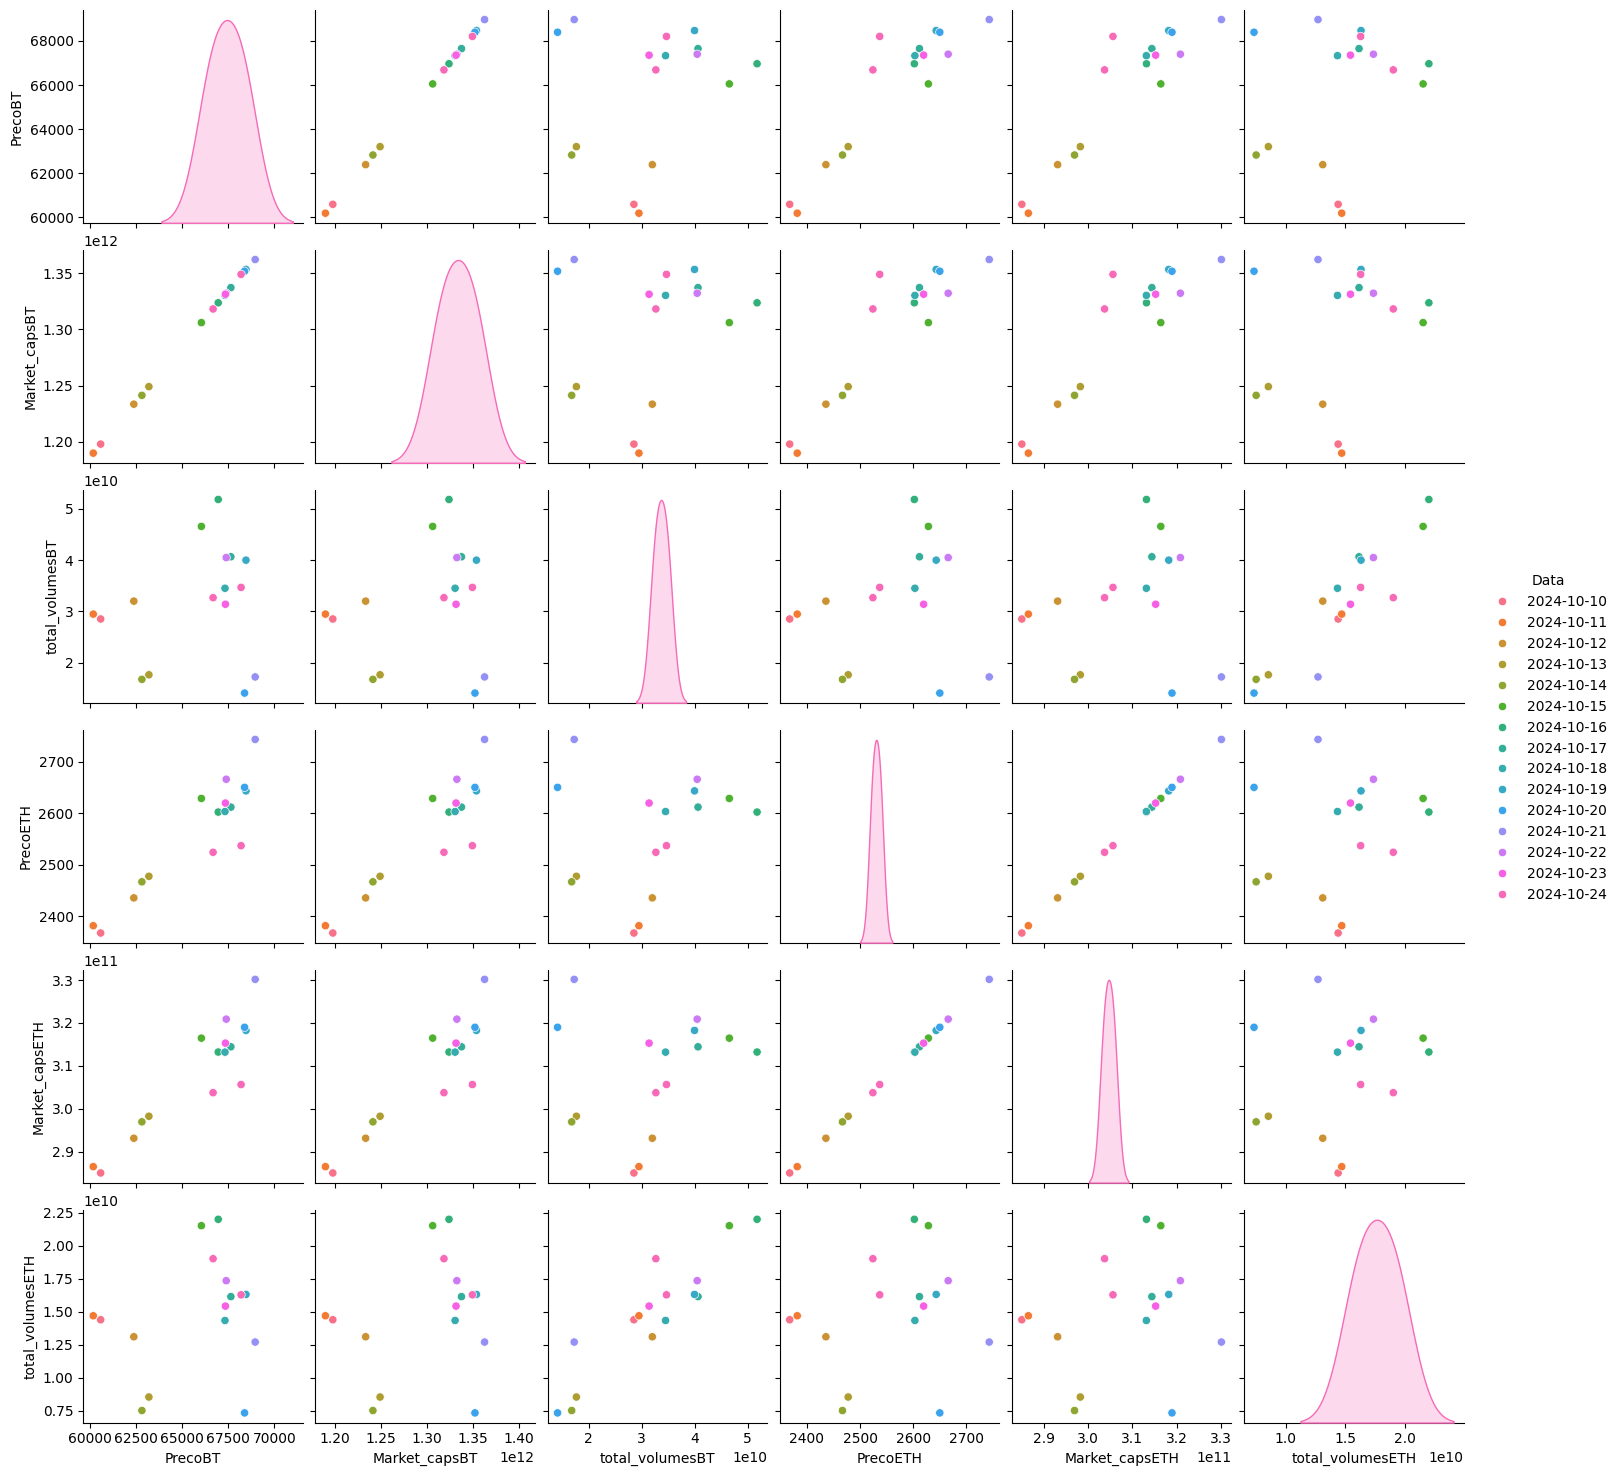

In [32]:
# pairplot é um gráfico muito interessante do seaborn que traz diferentes gráficos baseado na variável qualitativa do dataset
# A variavel qualitativa Data não trouxe grandes insights para nossa análise, e por conta disso não foi colocado na documentação.
sns.pairplot(df_geral, hue='Data')

In [32]:
# Importando as bibliotecas de machine learning
# Aqui iniciamos a parte de treinamento do modelo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [33]:
# o metodo shift define que serão criadas 10 espaços na tabela de predição.
df_geral['PrecoBT_pred'] = df_geral['PrecoBT'].shift(-10)
df_geral['PrecoETH_pred'] = df_geral['PrecoETH'].shift(-10)


In [34]:
# Apagando valores NaN
df_geral = df_geral.dropna()

In [35]:
#Definindo as variáveis X e Y para fazer o treinamento(Rotulo e Target)
X = df_geral[['PrecoBT', 'PrecoETH', 'Market_capsBT', 'Market_capsETH']]
Y = df_geral[['PrecoETH_pred', 'PrecoBT_pred']]

In [36]:
# Aplicando o metodo train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=1)

In [37]:
#A escolha do metodo RandomForestRegressor se dá pela sua maior complexidade e forma de aprender
# O metodo de regressão analisa padrões lineares, já o random trabalha com padrões gerais.
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=1)

In [38]:
#Calculando a var
y_pred = model.predict(X_test)

In [39]:
#Criando o datrafem y_pred com as informações que queremos
y_pred_df = pd.DataFrame(y_pred, columns=['PrecoETH_pred', 'PrecoBT_pred'])

In [40]:
#Apresentando o resultado da predição com suas primeiras 10 linhas

y_pred_df.head(10)

,PrecoETH_pred,PrecoBT_pred
0,2460.105832,62715.829289
1,2439.429850,57986.172971
2,2585.049465,63233.065520
3,2611.534860,67313.167290
4,2574.161030,63653.135750
5,2565.360777,63769.275167
6,2481.448498,63276.090609
7,2614.173320,67571.372868
8,2602.053838,63737.354247
9,2547.119167,63707.120627


In [41]:
# Avaliação do modelo
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(Y_test,y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f'Erro absoluto médio: {mae}')
print(f'Raiz do erro quadrático: {rmse}')
print(f'R2:{r2}')

# Os resultados não ideais se dão principalmente pelo conceito de underfitting, ou seja, há pouca base de dados para ser treinada, o que pode gerar previsões
# O R2 de 60% nos dá um bom indício, pois indica que o modelo explica 60% dos dados.

Erro Quadrático Médio (MSE): 5637307.128680278
Erro absoluto médio: 1215.7525994328223
Raiz do erro quadrático: 2374.3013980285396
R2:0.05276769229458089


In [2]:
#Gerando o requirements.txt

!pip freeze > requirements.txt

from google.colab import files

files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>